In [1]:
import os
import pandas as pd
import sys
import numpy as np
BASE_DIR = os.path.dirname(os.path.abspath("/home/yildirir/workspace/votenet/README.md"))
ROOT_DIR = BASE_DIR
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'scannet'))

print(sys.path)
from scannet.model_util_scannet import ScannetDatasetConfig
DC = ScannetDatasetConfig()

DATASET_DIR = "/mnt/canis/Datasets/ScanNet/"


FILE_LIST_RANDOM = "/home/yildirir/workspace/votenet/splits_5/train_0_1201.txt"
FILE_LIST_FULL = "/home/yildirir/workspace/votenet/splits_5/train_0_1201.txt"
_LIST_UNC = "/home/yildirir/workspace/votenet/uncertainty_trials_1/uncertainty_split_5_ent/accumulating.txt"



NameError: name 'sys' is not defined

In [20]:
def parsetxt(s):
    f2 = open(os.path.join(DATASET_DIR,"scans",s,s + ".txt"),"r")
    scenetype = None
    for line in f2:
        if line.split()[0] != "sceneType":
            continue 
        
        
        scenetype = line[12:-1]
    return scenetype
def get_full_scene_dict(FILE_LIST=None):
    scene_dict = {}
    with  open(FILE_LIST,"r") as f:
        scenes= [p.split()[0] for p in f]
        for s in scenes:
            scene_class = parsetxt(s)
            scene_dict[scene_class] = 0
    return scene_dict
    
def get_category(FILE_LIST,header_name=None,num_scenes=1200):
    f = open(FILE_LIST,"r")

    scenes= [p.split()[0] for p in f]
    scenes = scenes[:num_scenes]

    scene_dict = get_full_scene_dict(FILE_LIST_FULL)
    for s in scenes:
        # print(s.split())
        scene_class = parsetxt(s)
        if scene_class in scene_dict.keys():
            scene_dict[scene_class] += 1
        # else:
        #     scene_dict[scene_class] = [1]

    df = pd.DataFrame.from_dict(scene_dict,orient="index",columns=[header_name])
    # df["Entropy per scene"] = df["Entropy"]/df[header_name]
    return df

In [21]:
NAME="RANDOM"
initial = get_category(FILE_LIST_RANDOM,NAME,num_scenes=120).sort_values(by=NAME,ascending=False)
rand_02 = get_category(FILE_LIST_RANDOM,NAME,num_scenes=240).sort_values(by=NAME,ascending=False)
unc_02 = get_category(FILE_LIST_UNC,NAME,num_scenes=240).sort_values(by=NAME,ascending=False)


<AxesSubplot:>

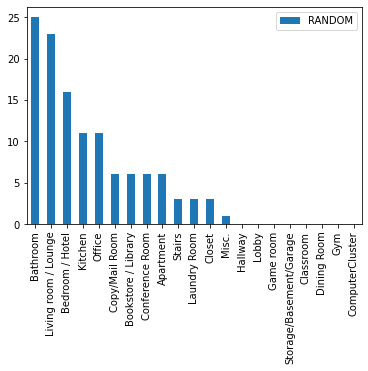

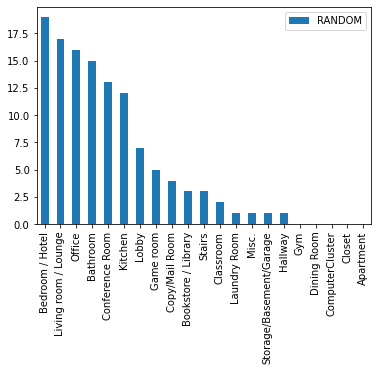

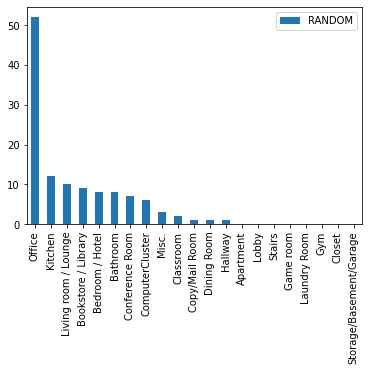

In [22]:
# (rand_02 - initial).plot.bar()
full = get_category(FILE_LIST_RANDOM,NAME,num_scenes=1201).sort_values(by=NAME,ascending=False)
initial.plot.bar()
(rand_02 - initial).sort_values(by=NAME,ascending=False).plot.bar()
(unc_02 - initial).sort_values(by=NAME,ascending=False).plot.bar()

<AxesSubplot:>

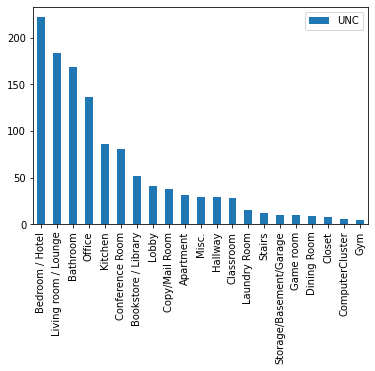

In [12]:
NAME="UNC"
get_category(FILE_LIST_FULL,NAME,num_scenes=1200).sort_values(by=NAME,ascending=False).plot.bar()

In [66]:
FILE_LIST = "/home/yildirir/workspace/votenet/selected_ratio_120_961.txt"
DATA_FOLDER = "/home/yildirir/workspace/votenet/scannet/scannet_train_detection_data/"
mydict = {'cabinet':0, 'bed':1, 'chair':2, 'sofa':3, 'table':4, 'door':5,
            'window':6,'bookshelf':7,'picture':8, 'counter':9, 'desk':10, 'curtain':11,
            'refrigerator':12, 'showercurtrain':13, 'toilet':14, 'sink':15, 'bathtub':16, 'garbagebin':17} 
revDict = {}
NUM_CLASSES = 18
for a in mydict.keys():

    revDict[mydict[a]] = a

def get_class_dist_in_scenes(FILE_LIST,num_scenes=1200):
    f = open(FILE_LIST,"r")

    scenes = [p.split()[0]  for p in f]
    scenes = scenes[:num_scenes]
    boxes = [np.load(os.path.join(DATA_FOLDER,s + "_bbox.npy"))[:,-1] for s in scenes]
    retDict = {}
    for i in range(NUM_CLASSES):
        retDict[revDict[i]] = 0
    for idx,bs in enumerate(boxes):
        classes = [np.where(DC.nyu40ids == x)[0][0] for x in bs ]
        print(classes)
        for c in classes:
            retDict[revDict[c]]+=1
    df = pd.DataFrame.from_dict(retDict,orient="index",columns=["Count"]).sort_values(by="Count")

    return df
    


In [45]:
PATH = "../splits/train_0_480.txt"
# get_category(PATH,"tr").sort_values(by="tr",ascending=False)


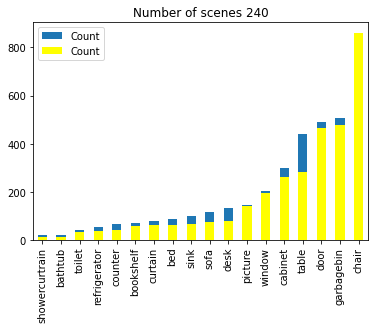

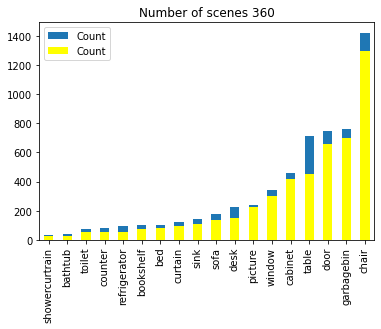

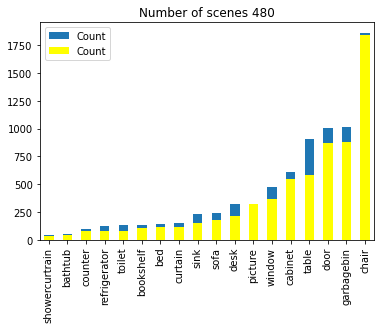

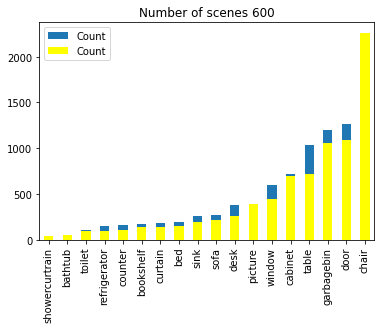

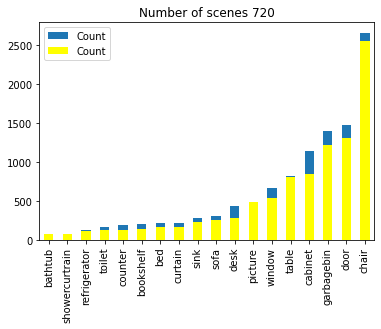

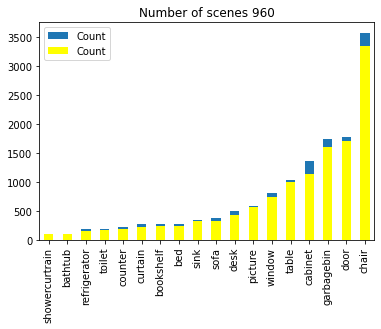

In [67]:
# PATH_UNC = "../uncertainty_splits/accumulating_0.txt"
# get_class_dist_in_scenes(PATH_UNC).plot.bar()
PATH = "../splits/train_0_480.txt"
PATH2 = "../splits/train_0_360.txt"
# get_category(PATH,"tr").sort_values(by="tr",ascending=False)
for ns in [240,360,480,600,720,960]:
    ax = get_class_dist_in_scenes(FILE_LIST_UNC,num_scenes=ns).plot.bar()
    # get_class_dist_in_scenes(PATH2).plot.bar(color="r",ax=ax)
    get_class_dist_in_scenes(FILE_LIST_RANDOM,num_scenes=ns).plot.bar(ax=ax,color="yellow",title="Number of scenes {}".format(ns))

<AxesSubplot:>

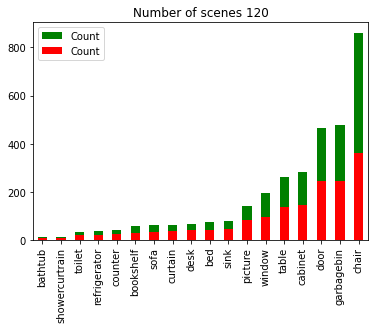

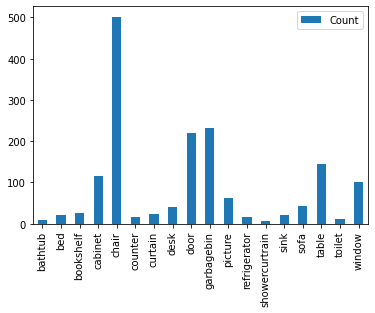

In [81]:
my_ax = get_class_dist_in_scenes(FILE_LIST_RANDOM,num_scenes=240).plot.bar(color="green",title="Number of scenes {}".format(240))
get_class_dist_in_scenes(FILE_LIST_RANDOM,num_scenes=120).plot.bar(ax=my_ax,color="red",title="Number of scenes {}".format(120))

prev_random = get_class_dist_in_scenes(FILE_LIST_RANDOM,num_scenes=120)
next_random = get_class_dist_in_scenes(FILE_LIST_RANDOM,num_scenes=240)
(next_random - prev_random).plot.bar()

<AxesSubplot:>

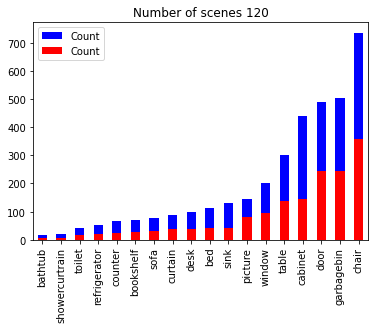

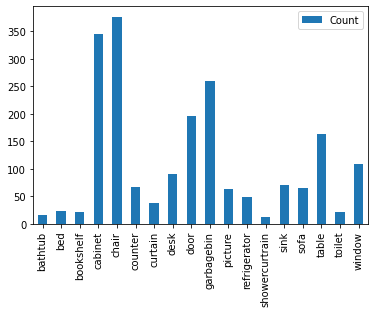

In [82]:
my_ax = get_class_dist_in_scenes(FILE_LIST_UNC,num_scenes=240).plot.bar(color="blue",title="Number of scenes {}".format(240))
get_class_dist_in_scenes(FILE_LIST_UNC,num_scenes=120).plot.bar(ax=my_ax,color="red",title="Number of scenes {}".format(120))

prev_unc = get_class_dist_in_scenes(FILE_LIST_UNC,num_scenes=120)
next_unc = get_class_dist_in_scenes(FILE_LIST_UNC,num_scenes=240)
(next_unc - prev_unc).plot.bar()

<AxesSubplot:>

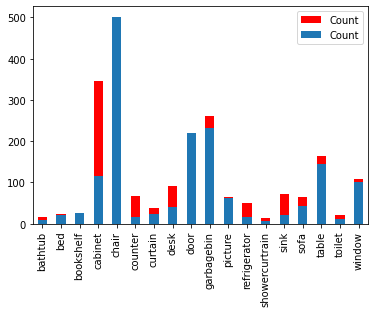

In [85]:
randax = (next_unc - prev_unc).plot.bar(color="red")
(next_random - prev_random).plot.bar(ax = randax)

In [87]:
(next_unc - prev_unc)
# UPATH = "../uncertainty_splits/accumulating_0_480.txt"
# UPATH2 = "../uncertainty_splits/accumulating_0_360.txt"
# # get_category(PATH,"tr").sort_values(by="tr",ascending=False)

# ax2 = get_class_dist_in_scenes(UPATH).plot.bar()
# get_class_dist_in_scenes(UPATH2).plot.bar(color="r",ax=ax2)
# get_class_dist_in_scenes(FILE_LIST_VAL).plot.bar(ax=ax2,color="yellow")

,Count
bathtub,16
bed,23
bookshelf,22
cabinet,346
chair,377
counter,66
curtain,38
desk,91
door,196
garbagebin,260


<AxesSubplot:>

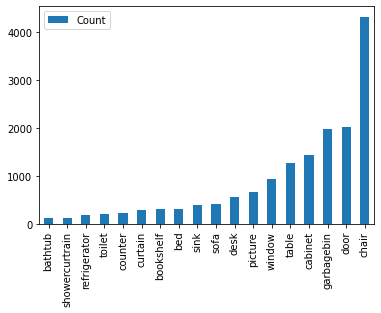

In [68]:
FILE_LIST_FULL = "/home/yildirir/workspace/votenet/splits_4/train_0_1201.txt"

df = get_class_dist_in_scenes(FILE_LIST_FULL)
df = df.sort_values(by="Count")
df.plot.bar()

In [1]:
import pandas as pd
import numpy as np
# files = list(pd.read_csv("/home/yildirir/workspace/votenet/splits_4/train_0_1200.txt",header=None).values[:,0])
# np.random.shuffle(files)


In [2]:
# ratios = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# num_scenes = len(files)
# inds = np.array(np.floor(ratios*num_scenes),dtype=np.int)
# splits = []
# for idx,i in enumerate(inds):
#     elems = files[:i]
#     with open("../splits_4/train_0_{}.txt".format(i),"w") as f:
#         for e in elems:
#             f.write(e + "\n")


In [6]:
f = open("/home/yildirir/workspace/votenet/splits_4/train_0_1201.txt","r")
dicty = {}
for line in f:
    name = line[:line.find("_")] 
    if name in dicty.keys():
        dicty[name].append(line[:line.find("\n")])
    else:
        dicty[name] = [line[:line.find("\n")]]
f.close()
scenes = np.array(list(dicty.keys()))
np.random.shuffle(scenes)

new_files = []
for s in scenes:
    elems = dicty[s]
    for e in elems:
        new_files.append(e)
        

In [7]:
ratios = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
num_scenes = len(new_files)
inds = np.array(np.floor(ratios*num_scenes),dtype=np.int)
splits = []
for idx,i in enumerate(inds):
    elems = new_files[:i]
    with open("../splits_8/train_0_{}.txt".format(i),"w") as f:
        for e in elems:
            f.write(e + "\n")

In [8]:
new_files[-5:]

['scene0541_01',
 'scene0541_02',
 'scene0291_00',
 'scene0291_01',
 'scene0291_02']

['scene0302_00',
 'scene0302_01',
 'scene0181_00',
 'scene0181_01',
 'scene0181_02',
 'scene0181_03',
 'scene0157_00',
 'scene0157_01',
 'scene0402_00',
 'scene0242_00',
 'scene0242_01',
 'scene0242_02',
 'scene0223_00',
 'scene0223_01',
 'scene0223_02',
 'scene0171_00',
 'scene0171_01',
 'scene0705_00',
 'scene0705_01',
 'scene0705_02',
 'scene0687_00',
 'scene0692_00',
 'scene0692_01',
 'scene0692_02',
 'scene0692_03',
 'scene0692_04',
 'scene0597_00',
 'scene0597_01',
 'scene0597_02',
 'scene0679_00',
 'scene0679_01',
 'scene0205_00',
 'scene0205_01',
 'scene0205_02',
 'scene0108_00',
 'scene0333_00',
 'scene0677_00',
 'scene0677_01',
 'scene0677_02',
 'scene0262_00',
 'scene0262_01',
 'scene0248_00',
 'scene0248_01',
 'scene0248_02',
 'scene0448_00',
 'scene0448_01',
 'scene0448_02',
 'scene0675_00',
 'scene0675_01',
 'scene0579_00',
 'scene0579_01',
 'scene0579_02',
 'scene0437_00',
 'scene0437_01',
 'scene0683_00',
 'scene0014_00',
 'scene0478_00',
 'scene0478_01',
 'scene0239_00